The [data](https://www.kaggle.com/henriqueyamahata/bank-marketing) is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

> Number of Instances: 45211

> Number of Attributes: 16 + output attribute.


The classification goal is to predict if the client will subscribe a term deposit (variable y).


# Attribute information:
   Input variables:
  
   ## bank client data:
   
   1 - age (numeric)
  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
  
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
  
   6 - balance: average yearly balance, in euros (numeric) 
  
   7 - housing: has housing loan? (binary: "yes","no")
  
   8 - loan: has personal loan? (binary: "yes","no")
  
   ## related with the last contact of the current campaign:
   
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
  
   ## other attributes:
  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)

  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

# Output variable (desired target):

  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
import matplotlib.patches as patches
from aif360.algorithms.preprocessing import Reweighing
#from packages import *
#from ml_fairness import *
import matplotlib.pyplot as plt
import seaborn as sns



from IPython.display import Markdown, display

In [29]:
path = '../input/bank-marketing/bank-additional-full.csv'
df  = pd.read_csv('../../Data/bank-additional-full.csv', sep = ';')

In [30]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [32]:
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

#EDA 

In [33]:
int_column = df.dtypes[df.dtypes == 'int64'].index | df.dtypes[df.dtypes == 'float64'].index

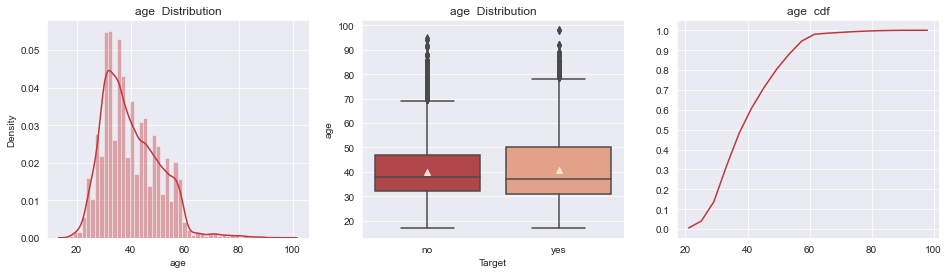

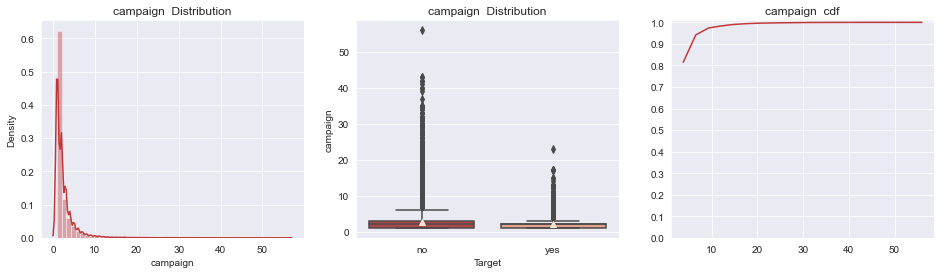

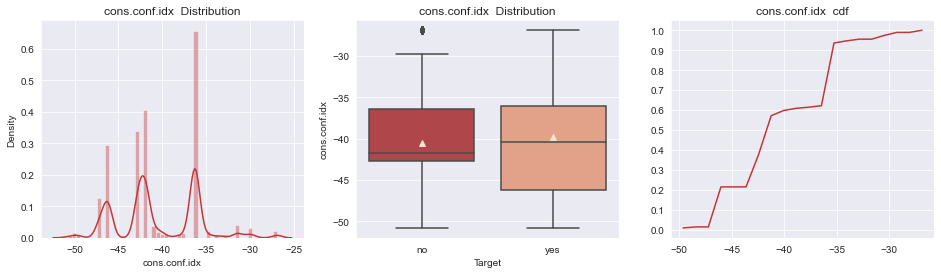

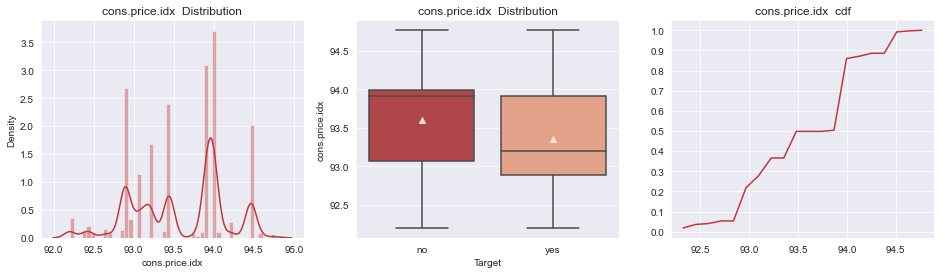

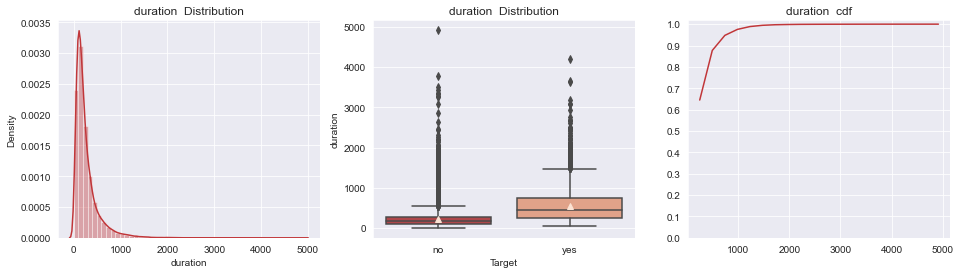

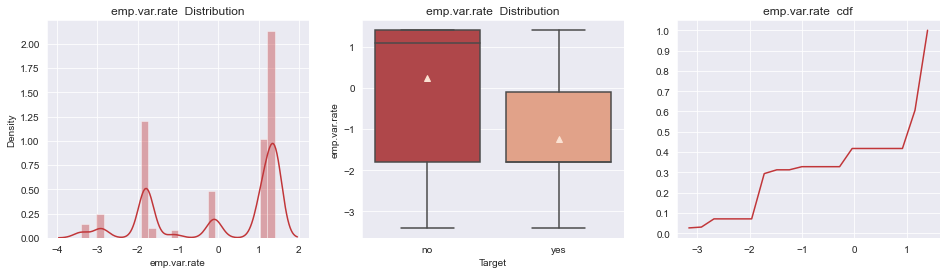

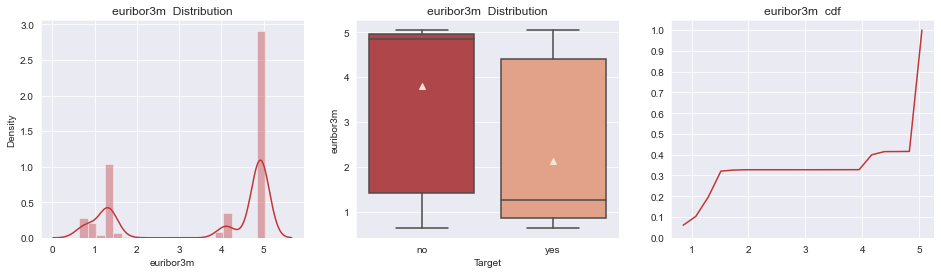

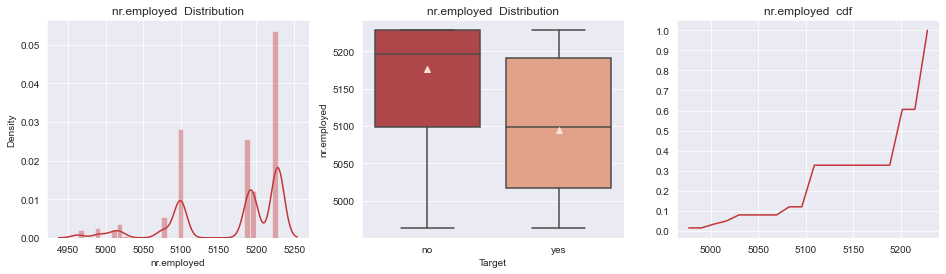

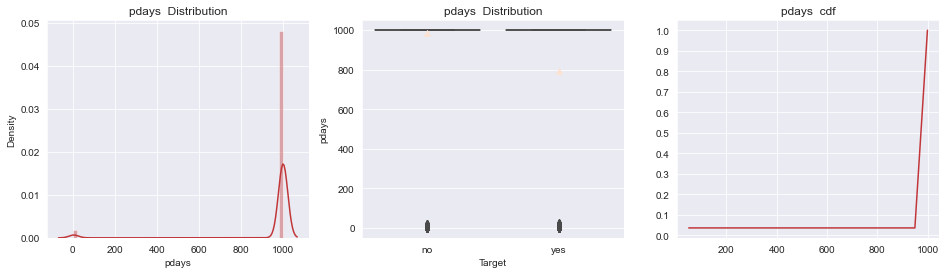

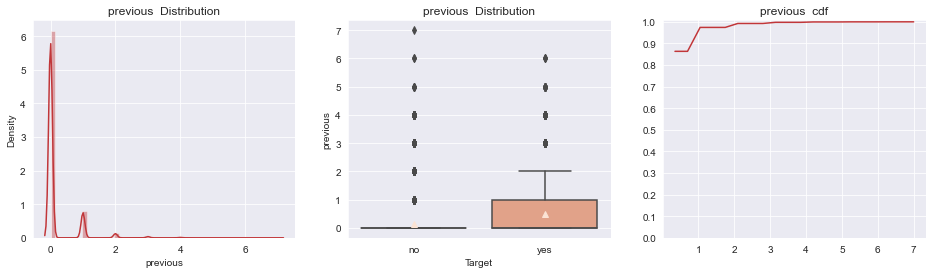

In [34]:

for column in int_column:
    plt.figure(figsize=(16,4))

    plt.subplot(1,3,1)
    sns.distplot(df[column])
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'{column}  Distribution')

    plt.subplot(1,3,2)
    sns.boxplot(x='y', y=column, data =df, showmeans=True )
    plt.xlabel('Target')
    plt.ylabel(column)
    plt.title(f'{column}  Distribution')

    plt.subplot(1,3,3)
    counts, bins = np.histogram(df[column], bins=20, normed=True)
    cdf = np.cumsum (counts)
    plt.plot (bins[1:], cdf/cdf[-1])
    #plt.xticks(range(15,100,5))
    plt.yticks(np.arange(0,1.1,.1))
    plt.title(f'{column}  cdf')
    plt.show()
    print()


In [35]:
# Quantiles
for column in int_column:
    print(f'For {column}:')

    print('Min:', df[column].quantile(q = 0))
    print('1º Quartile:', df[column].quantile(q = 0.25))
    print('2º Quartile:', df[column].quantile(q = 0.50))
    print('3º Quartile:', df[column].quantile(q = 0.75))
    print('Max:', df[column].quantile(q = 1.00),'\n')

For age:
Min: 17.0
1º Quartile: 32.0
2º Quartile: 38.0
3º Quartile: 47.0
Max: 98.0 

For campaign:
Min: 1.0
1º Quartile: 1.0
2º Quartile: 2.0
3º Quartile: 3.0
Max: 56.0 

For cons.conf.idx:
Min: -50.8
1º Quartile: -42.7
2º Quartile: -41.8
3º Quartile: -36.4
Max: -26.9 

For cons.price.idx:
Min: 92.20100000000001
1º Quartile: 93.075
2º Quartile: 93.749
3º Quartile: 93.994
Max: 94.76700000000001 

For duration:
Min: 0.0
1º Quartile: 102.0
2º Quartile: 180.0
3º Quartile: 319.0
Max: 4918.0 

For emp.var.rate:
Min: -3.4
1º Quartile: -1.8
2º Quartile: 1.1
3º Quartile: 1.4
Max: 1.4 

For euribor3m:
Min: 0.634
1º Quartile: 1.344
2º Quartile: 4.857
3º Quartile: 4.961
Max: 5.045 

For nr.employed:
Min: 4963.6
1º Quartile: 5099.1
2º Quartile: 5191.0
3º Quartile: 5228.1
Max: 5228.1 

For pdays:
Min: 0.0
1º Quartile: 999.0
2º Quartile: 999.0
3º Quartile: 999.0
Max: 999.0 

For previous:
Min: 0.0
1º Quartile: 0.0
2º Quartile: 0.0
3º Quartile: 0.0
Max: 7.0 



In [36]:
df.drop(df[df.age>60].index, inplace=True)
df.drop(df[df.campaign>10].index, inplace=True)
df.drop(df[df.duration>1000].index, inplace=True)
df.drop('pdays', axis=1, inplace=True)

##For object type

In [37]:
dfgrouped = df.groupby('y')

In [38]:
def plot_barh(array,incrementer, bias, text_color ='blue', palette_style = 'darkgrid',palette_color = 'RdBu'):

    sns.set_style(palette_style)
    sns.set_palette(palette_color)

    plt.barh(array.index, width = array.values, height = .5)
    plt.yticks(np.arange(len(array)))
    plt.xticks( range(0, round(max(array)) +bias, incrementer ))

    for index, value in enumerate(array.values):
        plt.text(value +.5, index, s= '{:.1f}%'.format(value), color = text_color)

    #plt.show()
    return plt

In [39]:
def feature_perc(feature,groupby= 'yes'):

    count = dfgrouped.get_group(groupby)[feature].value_counts()
    total_count = df[feature].value_counts()[count.index]

    perc = (count/total_count)*100
    return perc 

In [40]:
obj_column = df.dtypes[df.dtypes == 'object'].index
obj_column

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

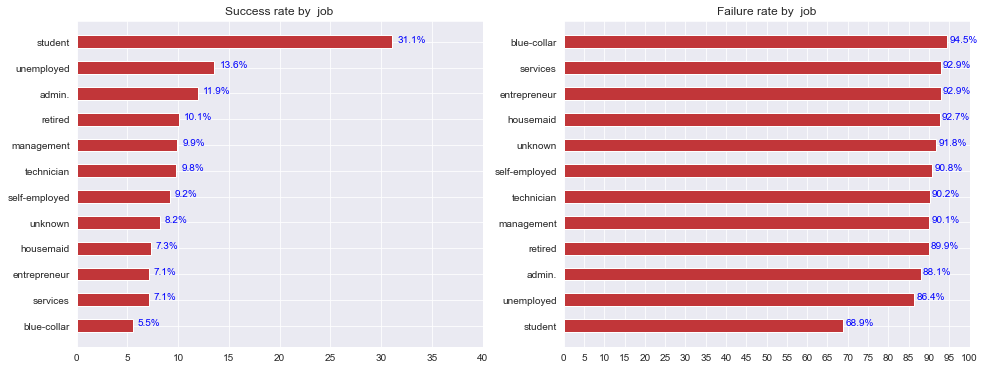

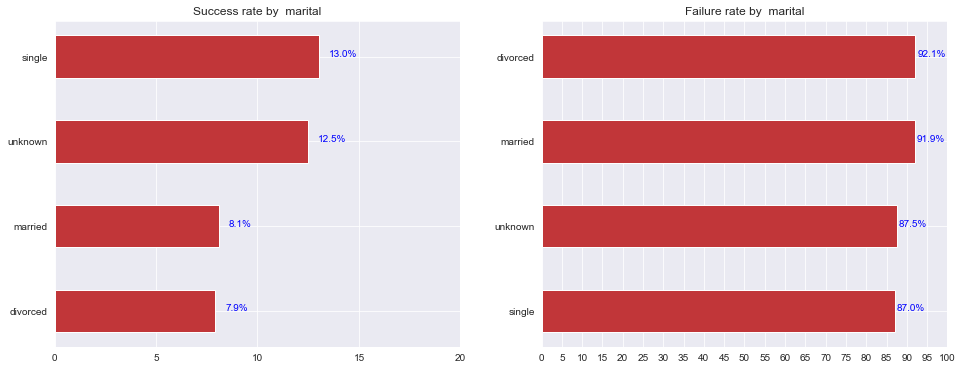

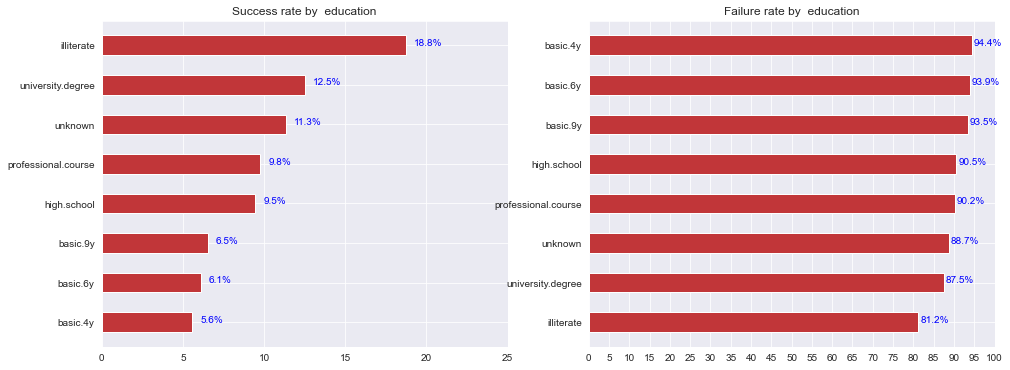

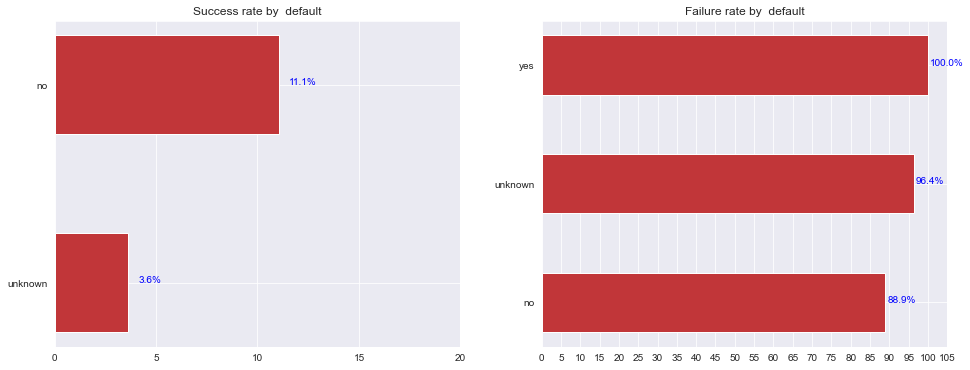

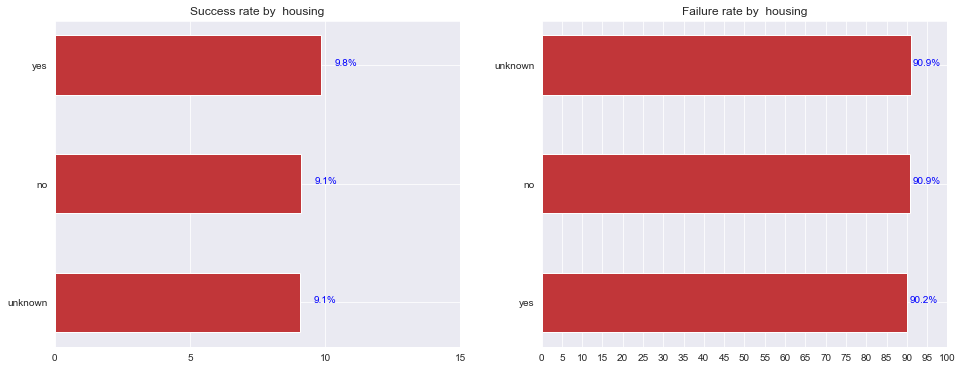

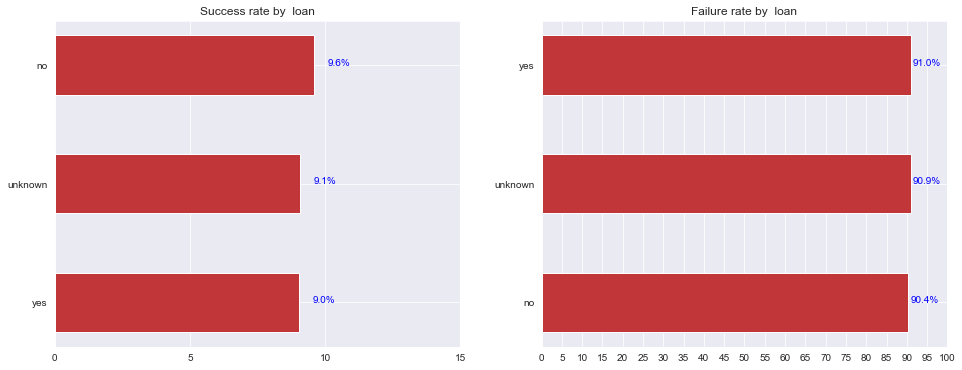

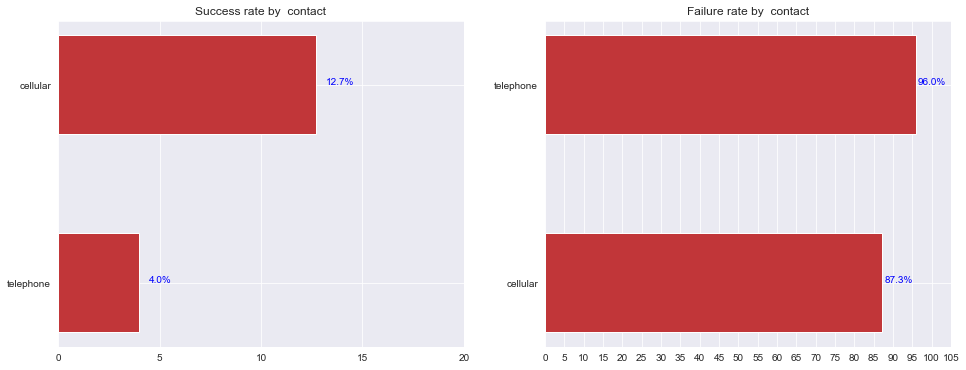

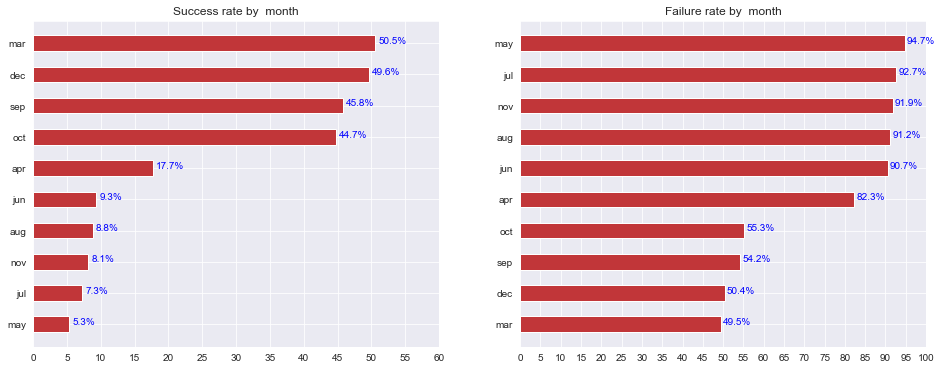

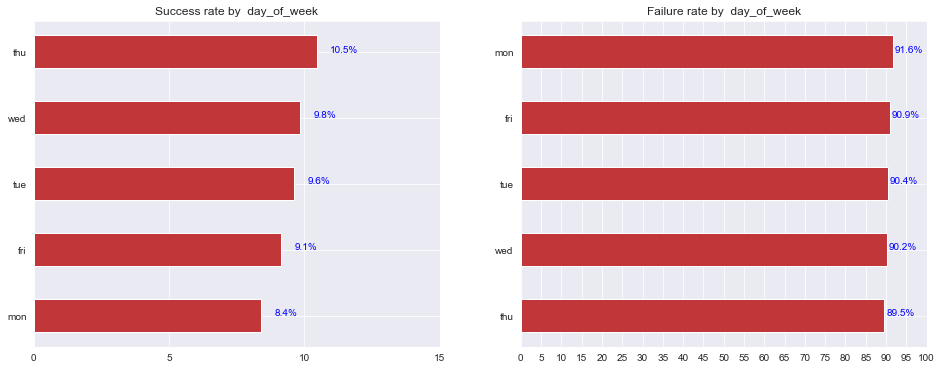

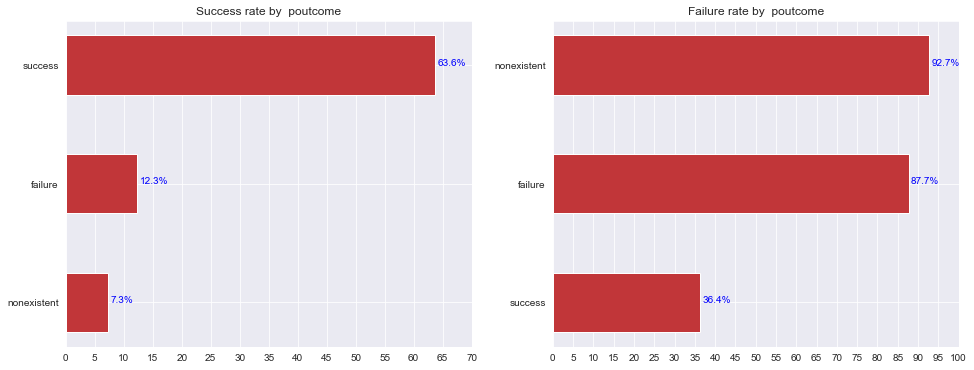

In [41]:
for column in obj_column[:-1]:

    yes_perc = feature_perc(column, groupby='yes')
    no_perc = feature_perc(column, groupby='no')

    plt.figure(figsize=(16,6))

    plt.subplot(1,2,1)
    plt.title(f'Success rate by  {column}')
    plot_barh(yes_perc.sort_values(),5,10)

    plt.subplot(1,2,2)
    plt.title(f'Failure rate by  {column}')
    plot_barh(no_perc.sort_values(),5,10)
    plt.show()
    print()


##Modeling

In [42]:
df1 = df.copy()
df1['y'] = df1.y.apply(lambda x:0 if x=='no' else 1)

In [43]:
df1.y.value_counts()

0    34837
1     3654
Name: y, dtype: int64

In [44]:
from sklearn.utils import resample

# Separate majority and minority classes
df1_majority = df1[df1.y==0]
df1_minority = df1[df1.y==1]
 
# Upsample minority class
df1_minority_upsampled = resample(df1_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=36962,    # to match majority class
                                 random_state=42) # reproducible results
 
# Combine majority class with upsampled minority class
df = pd.concat([df1_majority, df1_minority_upsampled])
 
# Display new class counts
df.y.value_counts()

1    36962
0    34837
Name: y, dtype: int64

In [45]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10418,31,blue-collar,single,high.school,no,yes,no,telephone,jun,mon,750,2,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,1
41089,50,blue-collar,divorced,professional.course,no,yes,no,telephone,nov,tue,301,2,2,success,-1.1,94.767,-50.8,1.049,4963.6,1
28315,24,services,single,high.school,no,yes,no,cellular,apr,wed,209,1,0,nonexistent,-1.8,93.075,-47.1,1.445,5099.1,1
37370,50,blue-collar,married,unknown,no,yes,yes,cellular,aug,tue,589,2,0,nonexistent,-2.9,92.201,-31.4,0.883,5076.2,1


In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
obj_column = df.dtypes[df.dtypes == 'object'].index
mapingdf = pd.DataFrame()

for column in obj_column:
    labelencoder = LabelEncoder()
    df[column] = labelencoder.fit_transform(df[column])
    mapingdf[column] = df[column]
    mapingdf['_'+column] =  labelencoder.inverse_transform(df[column])


In [48]:
#for reference
mapingdf

,job,_job,marital,_marital,education,_education,default,_default,housing,_housing,loan,_loan,contact,_contact,month,_month,day_of_week,_day_of_week,poutcome,_poutcome
0,3,housemaid,1,married,0,basic.4y,0,no,0,no,0,no,1,telephone,6,may,1,mon,1,nonexistent
1,7,services,1,married,3,high.school,1,unknown,0,no,0,no,1,telephone,6,may,1,mon,1,nonexistent
2,7,services,1,married,3,high.school,0,no,2,yes,0,no,1,telephone,6,may,1,mon,1,nonexistent
3,0,admin.,1,married,1,basic.6y,0,no,0,no,0,no,1,telephone,6,may,1,mon,1,nonexistent
4,7,services,1,married,3,high.school,0,no,0,no,2,yes,1,telephone,6,may,1,mon,1,nonexistent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10418,1,blue-collar,2,single,3,high.school,0,no,2,yes,0,no,1,telephone,4,jun,1,mon,1,nonexistent
41089,1,blue-collar,0,divorced,5,professional.course,0,no,2,yes,0,no,1,telephone,7,nov,3,tue,2,success
28315,7,services,2,single,3,high.school,0,no,2,yes,0,no,0,cellular,0,apr,4,wed,1,nonexistent
37370,1,blue-collar,1,married,7,unknown,0,no,2,yes,2,yes,0,cellular,1,aug,3,tue,1,nonexistent


In [49]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [50]:
df.corr().y.sort_values()

nr.employed      -0.500399
euribor3m        -0.484825
emp.var.rate     -0.470143
contact          -0.266817
cons.price.idx   -0.218605
default          -0.199083
campaign         -0.123641
age              -0.088051
month            -0.006676
loan             -0.004963
housing           0.022901
day_of_week       0.023312
job               0.040661
cons.conf.idx     0.063091
marital           0.113907
education         0.139356
poutcome          0.169871
previous          0.269263
duration          0.498898
y                 1.000000
Name: y, dtype: float64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('y',axis=1),
                                                    df['y'],
                                                    test_size=.3, random_state = 42,
                                                    stratify= df['y'])

In [28]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ValueError: could not convert string to float: 'blue-collar'

In [ ]:
models = [DecisionTreeClassifier(),
          RandomForestClassifier(),
          XGBClassifier()]

names = [ 'DecisionTreeClassifier',
          'RandomForestClassifier',
          'XGBClassifier']

for model,name in zip(models,names):
  m = model.fit(X_train,y_train)
  print(name, 'report:')
  print('Train score',model.score(X_train,y_train))
  print('Test score',model.score(X_test,y_test))
  print()
  print("Train confusion matrix:\n",confusion_matrix(y_train, model.predict(X_train)),'\n')
  print("Test confusion matrix:\n",confusion_matrix(y_test, model.predict(X_test)))
  print('*'*50)


In [ ]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(model,
          feature_names= df1.drop('y', axis=1).columns,  
          class_names= ['yes','no'],
          filled=True)
plt.show()

In [56]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] < 25, 'age'] = 0
    dataframe.loc[dataframe['age'] >= 25, 'age'] = 1
           
    return dataframe

age(df);

In [57]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,3,1,0,0,0,0,1,6,1,261,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,1,7,1,3,1,0,0,1,6,1,149,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,1,7,1,3,0,2,0,1,6,1,226,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,1,0,1,1,0,0,0,1,6,1,151,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,1,7,1,3,0,0,2,1,6,1,307,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10418,1,1,2,3,0,2,0,1,4,1,750,2,0,1,1.4,94.465,-41.8,4.960,5228.1,1
41089,1,1,0,5,0,2,0,1,7,3,301,2,2,2,-1.1,94.767,-50.8,1.049,4963.6,1
28315,0,7,2,3,0,2,0,0,0,4,209,1,0,1,-1.8,93.075,-47.1,1.445,5099.1,1
37370,1,1,1,7,0,2,2,0,1,3,589,2,0,1,-2.9,92.201,-31.4,0.883,5076.2,1


## Fairness

In [51]:
# This DataFrame is created to stock differents models and fair metrics that we produce in this notebook
algo_metrics = pd.DataFrame(columns=['model', 'fair_metrics', 'prediction', 'probs'])

def add_to_df_algo_metrics(algo_metrics, model, fair_metrics, preds, probs, name):
    return algo_metrics.append(pd.DataFrame(data=[[model, fair_metrics, preds, probs]], columns=['model', 'fair_metrics', 'prediction', 'probs'], index=[name]))

In [52]:
def fair_metrics(dataset, pred, pred_is_dataset=False):
    if pred_is_dataset:
        dataset_pred = pred
    else:
        dataset_pred = dataset.copy()
        dataset_pred.labels = pred
    
    cols = ['statistical_parity_difference', 'equal_opportunity_difference', 'average_abs_odds_difference',  'disparate_impact', 'theil_index']
    obj_fairness = [[0,0,0,1,0]]
    
    fair_metrics = pd.DataFrame(data=obj_fairness, index=['objective'], columns=cols)
    
    for attr in dataset_pred.protected_attribute_names:
        idx = dataset_pred.protected_attribute_names.index(attr)
        privileged_groups =  [{attr:dataset_pred.privileged_protected_attributes[idx][0]}] 
        unprivileged_groups = [{attr:dataset_pred.unprivileged_protected_attributes[idx][0]}] 
        
        classified_metric = ClassificationMetric(dataset, 
                                                     dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        acc = classified_metric.accuracy()

        row = pd.DataFrame([[metric_pred.mean_difference(),
                                classified_metric.equal_opportunity_difference(),
                                classified_metric.average_abs_odds_difference(),
                                metric_pred.disparate_impact(),
                                classified_metric.theil_index()]],
                           columns  = cols,
                           index = [attr]
                          )
        fair_metrics = fair_metrics.append(row)    
    
    fair_metrics = fair_metrics.replace([-np.inf, np.inf], 2)
        
    return fair_metrics

def plot_fair_metrics(fair_metrics):
    fig, ax = plt.subplots(figsize=(20,4), ncols=5, nrows=1)

    plt.subplots_adjust(
        left    =  0.125, 
        bottom  =  0.1, 
        right   =  0.9, 
        top     =  0.9, 
        wspace  =  .5, 
        hspace  =  1.1
    )

    y_title_margin = 1.2

    plt.suptitle("Fairness metrics", y = 1.09, fontsize=20)
    sns.set(style="dark")

    cols = fair_metrics.columns.values
    obj = fair_metrics.loc['objective']
    size_rect = [0.2,0.2,0.2,0.4,0.25]
    rect = [-0.1,-0.1,-0.1,0.8,0]
    bottom = [-1,-1,-1,0,0]
    top = [1,1,1,2,1]
    bound = [[-0.1,0.1],[-0.1,0.1],[-0.1,0.1],[0.8,1.2],[0,0.25]]

    display(Markdown("### Check bias metrics :"))
    display(Markdown("A model can be considered bias if just one of these five metrics show that this model is biased."))
    for attr in fair_metrics.index[1:len(fair_metrics)].values:
        display(Markdown("#### For the %s attribute :"%attr))
        check = [bound[i][0] < fair_metrics.loc[attr][i] < bound[i][1] for i in range(0,5)]
        display(Markdown("With default thresholds, bias against unprivileged group detected in **%d** out of 5 metrics"%(5 - sum(check))))

    for i in range(0,5):
        plt.subplot(1, 5, i+1)
        ax = sns.barplot(x=fair_metrics.index[1:len(fair_metrics)], y=fair_metrics.iloc[1:len(fair_metrics)][cols[i]])
        
        for j in range(0,len(fair_metrics)-1):
            a, val = ax.patches[j], fair_metrics.iloc[j+1][cols[i]]
            marg = -0.2 if val < 0 else 0.1
            ax.text(a.get_x()+a.get_width()/5, a.get_y()+a.get_height()+marg, round(val, 3), fontsize=15,color='black')

        plt.ylim(bottom[i], top[i])
        plt.setp(ax.patches, linewidth=0)
        ax.add_patch(patches.Rectangle((-5,rect[i]), 10, size_rect[i], alpha=0.3, facecolor="green", linewidth=1, linestyle='solid'))
        plt.axhline(obj[i], color='black', alpha=0.3)
        plt.title(cols[i])
        ax.set_ylabel('')    
        ax.set_xlabel('')

In [58]:
def get_fair_metrics_and_plot(data, model, plot=False, model_aif=False):
    pred = model.predict(data).labels if model_aif else model.predict(data.features)
    # fair_metrics function available in the metrics.py file
    fair = fair_metrics(data, pred)

    if plot:
        # plot_fair_metrics function available in the visualisations.py file
        # The visualisation of this function is inspired by the dashboard on the demo of IBM aif360 
        plot_fair_metrics(fair)
        display(fair)
    
    return fair

In [59]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,3,1,0,0,0,0,1,6,1,261,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,1,7,1,3,1,0,0,1,6,1,149,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,1,7,1,3,0,2,0,1,6,1,226,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,1,0,1,1,0,0,0,1,6,1,151,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,1,7,1,3,0,0,2,1,6,1,307,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10418,1,1,2,3,0,2,0,1,4,1,750,2,0,1,1.4,94.465,-41.8,4.960,5228.1,1
41089,1,1,0,5,0,2,0,1,7,3,301,2,2,2,-1.1,94.767,-50.8,1.049,4963.6,1
28315,0,7,2,3,0,2,0,0,0,4,209,1,0,1,-1.8,93.075,-47.1,1.445,5099.1,1
37370,1,1,1,7,0,2,2,0,1,3,589,2,0,1,-2.9,92.201,-31.4,0.883,5076.2,1


In [60]:
#print(X)


#combine_final = [train_df, test_df]
#result = pd.concat(combine_final)
#print(result.ifany())
#print(result)
privileged_groups = [{'age': 1}]
unprivileged_groups = [{'age': 0}]
dataset_orig = StandardDataset(df,
                                  label_name='y',
                                  protected_attribute_names=['age'],
                                  favorable_classes=[1],
                                  privileged_classes=[[1]])

#metric_orig_train = BinaryLabelDatasetMetric(dataset_orig, 
#                                             unprivileged_groups=unprivileged_groups,
#                                             privileged_groups=privileged_groups)
#display(Markdown("#### Original training dataset"))
#print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())


In [61]:
metric_orig_train = BinaryLabelDatasetMetric(dataset_orig, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = 0.249761


In [62]:
models = [('DT',DecisionTreeClassifier(max_depth = 3)),
          ('RF',RandomForestClassifier()),
          ('XGB',XGBClassifier())]

In [63]:
import ipynbname
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
nb_fname = ipynbname.name()
nb_path = ipynbname.path()

from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
import pickle

data_orig_train, data_orig_test = dataset_orig.split([0.7], shuffle=True)
X_train = data_orig_train.features
y_train = data_orig_train.labels.ravel()

X_test = data_orig_test.features
y_test = data_orig_test.labels.ravel()

estimators = models

model = VotingClassifier(estimators = models)

mdl = model.fit(X_train, y_train)
#yy = mdl.predict(X_test)

with open('../../Results/VotingClassifier/' + nb_fname + '.pkl', 'wb') as f:
    pickle.dump(mdl, f)

with open('../../Results/VotingClassifier/' + nb_fname + '_Train' + '.pkl', 'wb') as f:
    pickle.dump(data_orig_train, f) 
    
with open('../../Results/VotingClassifier/' + nb_fname + '_Test' + '.pkl', 'wb') as f:
    pickle.dump(data_orig_test, f) 

In [64]:
from csv import writer
from sklearn.metrics import accuracy_score, f1_score

final_metrics = []
accuracy = []
list_estimators = []
f1= []
for name, ml_model in estimators:
    
    list_estimators.append((name,ml_model))
    print(list_estimators)
    model = VotingClassifier(estimators = list_estimators)
    
    mdl = model.fit(X_train, y_train)
    yy = mdl.predict(X_test)
    accuracy.append(accuracy_score(y_test, yy))
    f1.append(f1_score(y_test, yy))
    fair = get_fair_metrics_and_plot(data_orig_test, mdl)                           
    fair_list = fair.iloc[1].tolist()
    #fair_list.insert(0, i)
    final_metrics.append(fair_list)

[('DT', DecisionTreeClassifier(max_depth=3))]
[('DT', DecisionTreeClassifier(max_depth=3)), ('RF', RandomForestClassifier())]
[('DT', DecisionTreeClassifier(max_depth=3)), ('RF', RandomForestClassifier()), ('XGB', XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None))]


In [65]:
import numpy as np
final_result = pd.DataFrame(final_metrics)
final_result[3] = np.log(final_result[3])
final_result = final_result.transpose()
acc_f1 = pd.DataFrame(accuracy)
acc_f1['f1'] = f1
acc_f1 = pd.DataFrame(acc_f1).transpose()
acc = acc_f1.rename(index={0: 'accuracy', 1: 'f1'})
final_result = final_result.rename(index={0: 'statistical_parity_difference', 1: 'equal_opportunity_difference', 2: 'average_abs_odds_difference', 3: 'disparate_impact', 4: 'theil_index'})
final_result = pd.concat([acc,final_result])
final_result.to_csv('../../Results/VotingClassifier/' + nb_fname + '.csv')
final_result

,0,1,2
accuracy,0.855757,0.948654,0.946007
f1,0.870848,0.949841,0.949599
statistical_parity_difference,0.238559,0.263188,0.268871
equal_opportunity_difference,0.014589,0.014881,0.007284
average_abs_odds_difference,0.093943,0.041362,0.065051
disparate_impact,0.337586,0.423031,0.399724
theil_index,0.061686,0.035781,0.020921
